In [442]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pylab as plt

In [443]:
def discrete_univariate_analysis(data):
  for col in data:
    print(data[col].agg(['count','nunique','unique']))
    print('Value counts:\n', data[col].value_counts(normalize=True))

In [444]:
def numerical_univariate_analysis(data):
  for col in data:
    print(data[col].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurt']))
    print('\n')
    print('75th_quantile :', data[col].quantile(0.75))
    print('90th_quantile :', data[col].quantile(0.90))
    print('95th_quantile :', data[col].quantile(0.95))
    print('99th_quantile :', data[col].quantile(0.99))

In [445]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/innomatics/data.xlsx - Sheet1.csv')

In [446]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [447]:
pd.set_option('display.max_columns', None)

In [448]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [449]:
data = data.drop(['Unnamed: 0','ComputerProgramming','CollegeID','CollegeCityID','ElectronicsAndSemicon','ComputerScience','MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg'],axis=1)

In [450]:
today = dt.date.today()

data['DOL'].replace('present', today, inplace=True)

data['DOL'] = pd.to_datetime(data['DOL'])

data['DOJ'] = pd.to_datetime(data['DOJ'])

data['DOB'] = pd.to_datetime(data['DOB'])

In [451]:
data.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,2012-06-01,2024-03-10,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,0,Andhra Pradesh,2011,515,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,2013-09-01,2024-03-10,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,0,Madhya Pradesh,2012,695,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,2014-06-01,2024-03-10,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,0,Uttar Pradesh,2014,615,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,2011-07-01,2024-03-10,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,1,Delhi,2011,635,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,2014-03-01,2015-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,0,Uttar Pradesh,2012,545,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


**checking for fake data**

In [452]:
fake_exp = []
for i in range(data.shape[0]):
  x = data['DOJ'][i].year
  y = data['GraduationYear'][i]
  if x < y:
    fake = data.iloc[i]
    fake_exp.append(fake)
  else:
    continue

In [453]:
fake_exp = pd.DataFrame(fake_exp)

In [454]:
data = data.drop(fake_exp.index)

In [455]:
data.shape

(3918, 29)

# **Exploratory Data Analysis**

## **Salary**

In [456]:
numerical_univariate_analysis(data[['Salary']])

min       3.500000e+04
max       4.000000e+06
mean      3.088333e+05
median    3.000000e+05
std       2.135426e+05
skew      6.486938e+00
kurt      8.118277e+01
Name: Salary, dtype: float64


75th_quantile : 370000.0
90th_quantile : 480000.0
95th_quantile : 575000.0
99th_quantile : 929149.9999999997


<Axes: >

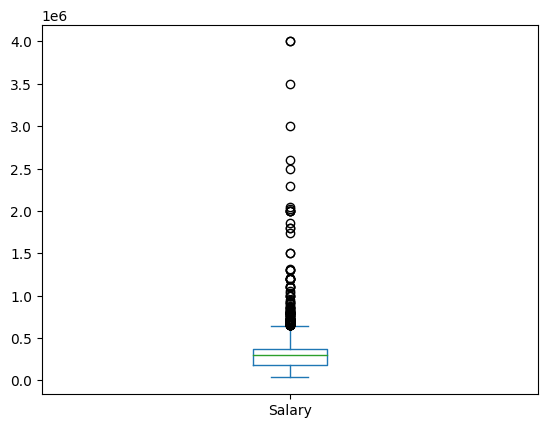

In [457]:
data.Salary.plot.box()

In [458]:
salary_outliers_treated = data.loc[data['Salary'] < 575000]

In [459]:
salary_outliers_treated.shape

(3721, 29)

<Axes: >

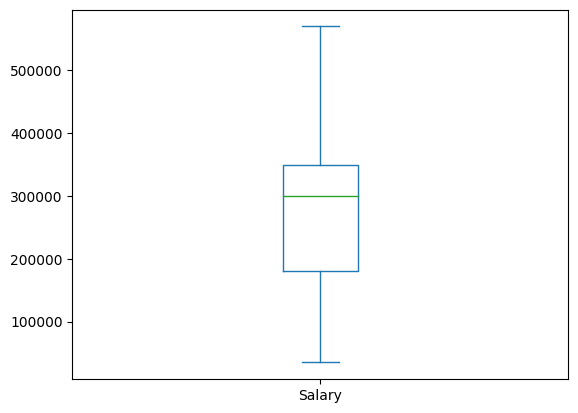

In [460]:
salary_outliers_treated.Salary.plot.box()



*   **Outliers treated with the thershold of Salary < 575000(95th quantile)**



## **Gender**

In [461]:
discrete_univariate_analysis(data[['Gender']])

count        3918
nunique         2
unique     [f, m]
Name: Gender, dtype: object
Value counts:
 m    0.759061
f    0.240939
Name: Gender, dtype: float64


<Axes: xlabel='Gender', ylabel='Salary'>

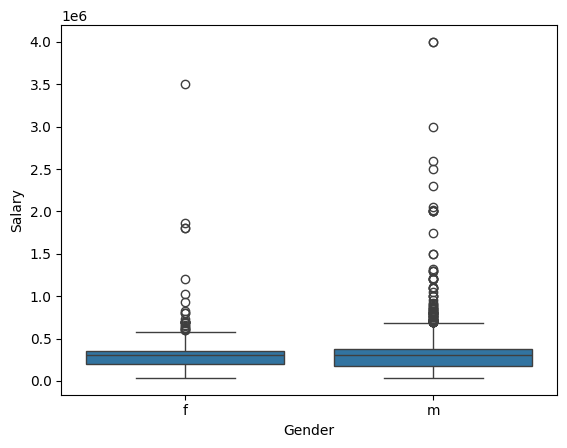

In [462]:
sns.boxplot(data, x='Gender', y='Salary')

<Axes: xlabel='Gender', ylabel='Salary'>

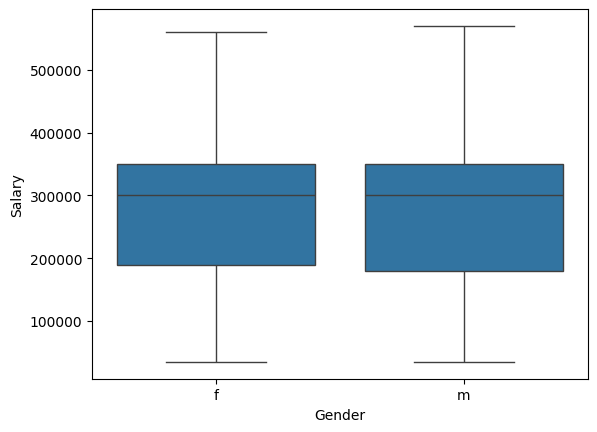

In [463]:
sns.boxplot(salary_outliers_treated , x='Gender', y='Salary')

From above Analysis it is clear that

*  In total employees there are approximately 76% are male and 24% are female
*  Male and female earns equally

## **10 percentage**

In [464]:
numerical_univariate_analysis(data[['10percentage']])

min       43.000000
max       97.760000
mean      77.956138
median    79.200000
std        9.842045
skew      -0.597656
kurt      -0.095493
Name: 10percentage, dtype: float64


75th_quantile : 85.75750000000001
90th_quantile : 89.8
95th_quantile : 91.6
99th_quantile : 94.2332


<Axes: xlabel='10percentage', ylabel='Salary'>

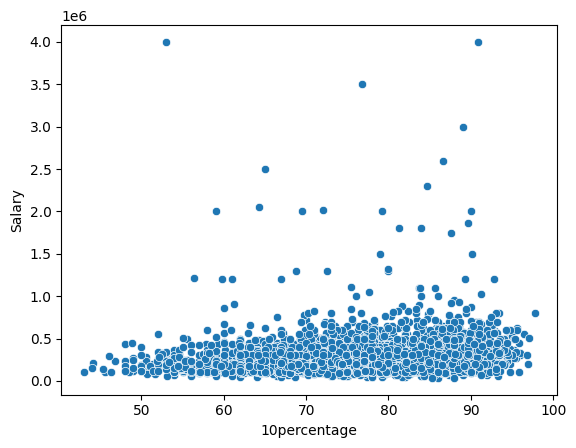

In [465]:
sns.scatterplot(data, x='10percentage', y='Salary')

<Axes: xlabel='10percentage', ylabel='Salary'>

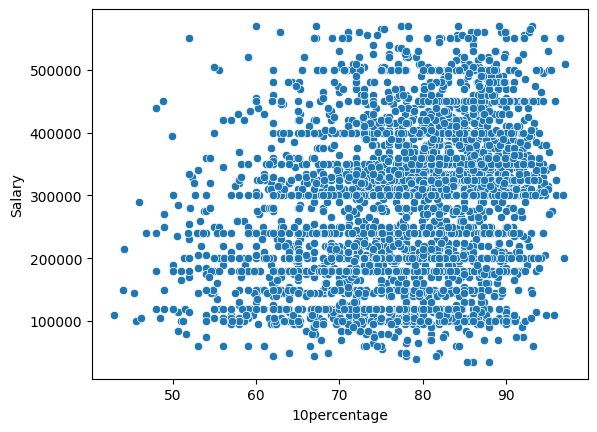

In [466]:
sns.scatterplot(salary_outliers_treated, x='10percentage', y='Salary')

**From above plots it clear that a person who scored more than 70% in their 10th grade earns more then a person who scores below 70%**

## **12 percentage**

In [467]:
# 12percentage

numerical_univariate_analysis(data[['12percentage']])

min       40.000000
max       98.700000
mean      74.520881
median    74.400000
std       11.007562
skew      -0.036270
kurt      -0.628318
Name: 12percentage, dtype: float64


75th_quantile : 82.6
90th_quantile : 89.67
95th_quantile : 92.91499999999996
99th_quantile : 96.0


<Axes: xlabel='12percentage', ylabel='Salary'>

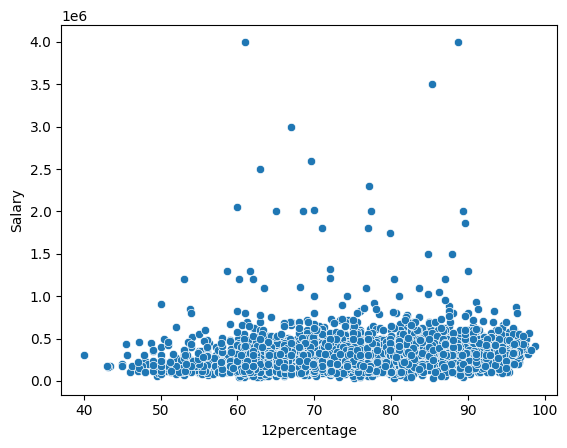

In [468]:
sns.scatterplot(data, x='12percentage', y='Salary')

<Axes: xlabel='12percentage', ylabel='Salary'>

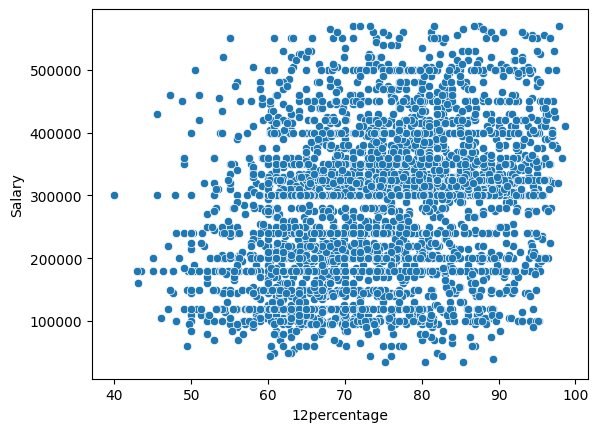

In [469]:
sns.scatterplot(salary_outliers_treated, x='12percentage', y='Salary')

**From above plots it clear that a person who scored more than 60% in their 12th grade are more likely to earns more salary than a person who scores below 60%**

## **College GPA**

In [470]:
# collegeGPA

numerical_univariate_analysis(data[['collegeGPA']])

min        6.450000
max       99.930000
mean      71.534153
median    71.730000
std        7.990913
skew      -0.990837
kurt       8.625975
Name: collegeGPA, dtype: float64


75th_quantile : 76.39
90th_quantile : 81.0
95th_quantile : 84.0
99th_quantile : 90.0


<Axes: xlabel='collegeGPA', ylabel='Salary'>

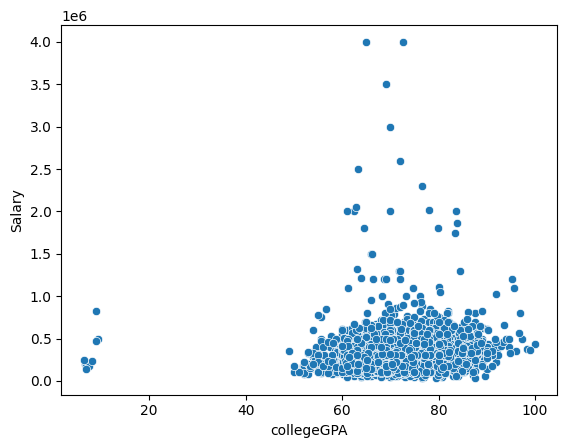

In [471]:
sns.scatterplot(data, x='collegeGPA', y='Salary')

<Axes: xlabel='collegeGPA', ylabel='Salary'>

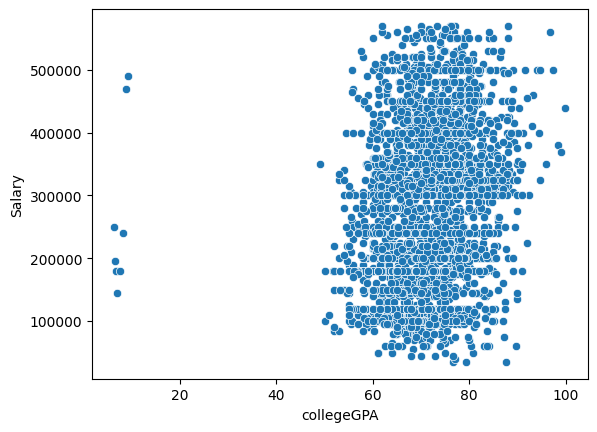

In [472]:
sns.scatterplot(salary_outliers_treated, x='collegeGPA', y='Salary')

**From above plots it clear that a person who scored more than 60% GPA in their college are more likely to earns more salary than a person who scores below 60%**

## **CollegeTier**

In [473]:
discrete_univariate_analysis(data[['CollegeTier']])

count        3918
nunique         2
unique     [2, 1]
Name: CollegeTier, dtype: object
Value counts:
 2    0.925983
1    0.074017
Name: CollegeTier, dtype: float64


<Axes: xlabel='CollegeTier', ylabel='Salary'>

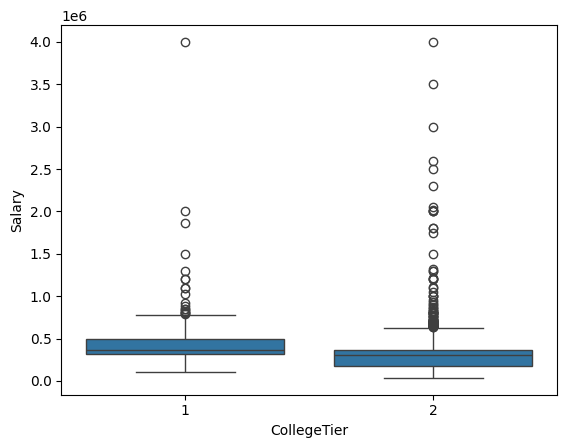

In [474]:
sns.boxplot(data , x='CollegeTier', y='Salary')

<Axes: xlabel='CollegeTier', ylabel='Salary'>

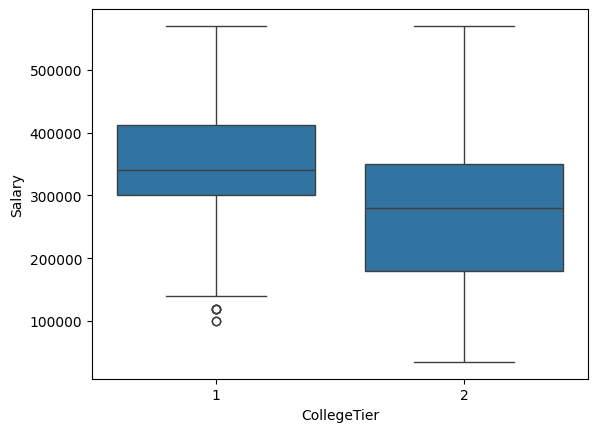

In [475]:
sns.boxplot(salary_outliers_treated , x='CollegeTier', y='Salary')

**From above plots its clear that a person who studied at tier 1 collage are most likely to get high paying job**

## **Degree**

In [476]:
data['Degree'] = data['Degree'].str.strip()
data['Degree'] = data['Degree'].str.lower()

discrete_univariate_analysis(data[['Degree']])

count                                                 3918
nunique                                                  4
unique     [b.tech/b.e., mca, m.tech./m.e., m.sc. (tech.)]
Name: Degree, dtype: object
Value counts:
 b.tech/b.e.      0.930577
mca              0.059980
m.tech./m.e.     0.009188
m.sc. (tech.)    0.000255
Name: Degree, dtype: float64


<Axes: xlabel='Degree', ylabel='Salary'>

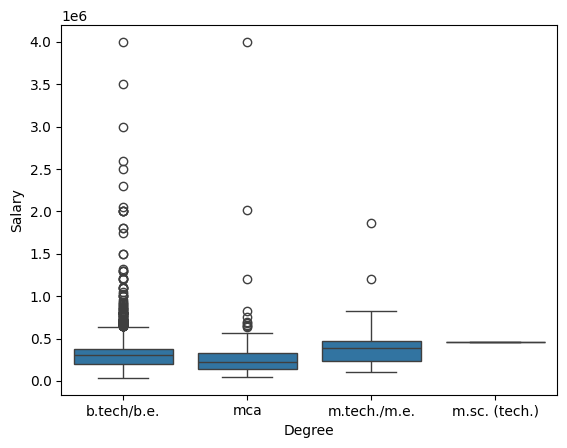

In [477]:
sns.boxplot(data , x='Degree', y='Salary')

<Axes: xlabel='Degree', ylabel='Salary'>

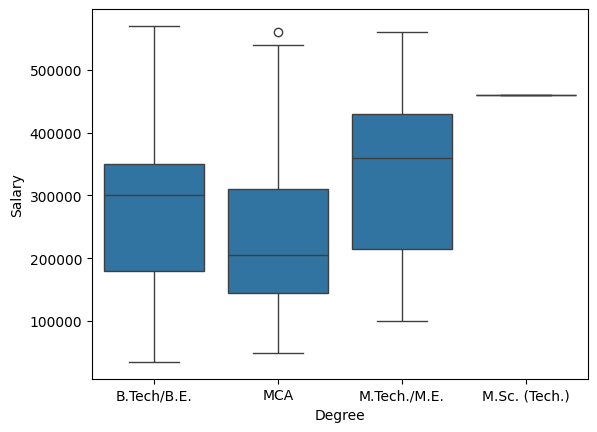

In [478]:
sns.boxplot(salary_outliers_treated , x='Degree', y='Salary')

*   **From above plots it is clear that those who studied M.Sc are more likely to get high paying job then any other degree**
*  **Those who completed B.Tech/B.E or M.Tech/M.E are more likely to get more salary than who studied MCA**



## **Specialization**

In [479]:
data_cs = data

In [480]:
data_cs['Specialization'].replace(['computer engineering','computer application','computer science and technology','electronics and computer engineering',
                                'computer and communication engineering','computer science'],'computer science & engineering', inplace=True)

data_cs['Designation'].replace('systems engineer','system engineer', inplace = True)

In [481]:
data_cs['Specialization'].value_counts()

computer science & engineering                 1561
electronics and communication engineering       871
information technology                          655
mechanical engineering                          194
electronics and electrical engineering          190
electronics & telecommunications                120
electrical engineering                           82
electronics & instrumentation eng                32
civil engineering                                28
information science engineering                  27
electronics and instrumentation engineering      26
instrumentation and control engineering          19
electronics engineering                          18
biotechnology                                    15
other                                            11
chemical engineering                              9
industrial & production engineering               9
applied electronics and instrumentation           9
telecommunication engineering                     6
automobile/a

In [482]:
for i in data_cs['Specialization'].unique():
  min_count = data_cs['Specialization'].value_counts()[:14].min()
  if data_cs[data_cs['Specialization'] == i]['Specialization'].value_counts()[0] < min_count:
    data_cs.loc[data_cs['Specialization'] == i, 'Specialization'] = 'other'

In [483]:
data_cs['Specialization'].value_counts()

computer science & engineering                 1561
electronics and communication engineering       871
information technology                          655
mechanical engineering                          194
electronics and electrical engineering          190
electronics & telecommunications                120
other                                            95
electrical engineering                           82
electronics & instrumentation eng                32
civil engineering                                28
information science engineering                  27
electronics and instrumentation engineering      26
instrumentation and control engineering          19
electronics engineering                          18
Name: Specialization, dtype: int64

In [484]:
data_cs = data_cs.loc[data_cs['Specialization'] == 'computer science & engineering']

In [485]:
data_cs.shape

(1561, 29)

In [486]:
for i in data_cs['Designation'].unique():
  min_count = data_cs['Designation'].value_counts()[:10].min()
  if data_cs[data_cs['Designation'] == i]['Designation'].value_counts()[0] < min_count:
    data_cs.loc[data_cs['Designation'] == i, 'Designation'] = 'other'

In [487]:
data_cs['Designation'].value_counts()

other                         712
software engineer             271
software developer            161
system engineer               114
java software engineer         60
programmer analyst             57
java developer                 49
software test engineer         43
technical support engineer     33
senior software engineer       31
application developer          30
Name: Designation, dtype: int64

In [488]:
data_cs = data_cs.loc[(data_cs['Designation'] == 'software engineer') | (data_cs['Designation'] == 'programmer analyst') | (data_cs['Designation'] == 'system engineer') ]

In [489]:
data_cs.shape

(442, 29)

<Axes: xlabel='Salary', ylabel='Designation'>

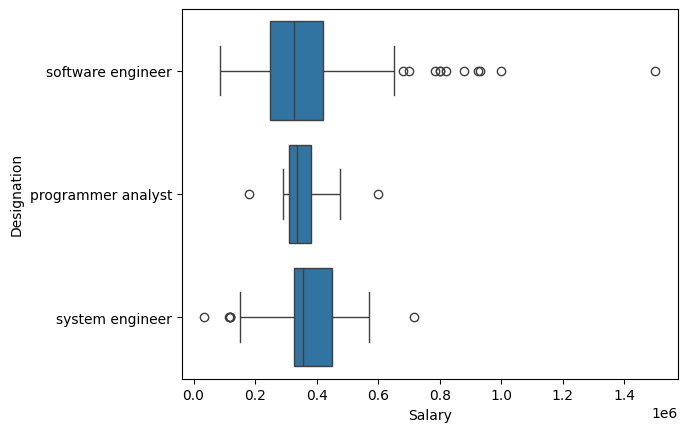

In [490]:
sns.boxplot(data_cs , x='Salary', y='Designation')

**From above plote its clear that those who prefered Computer Science Engineering Specialization earn up to 2.5-3 lakhs as a fresh graduate**

## **Gender Specalisation**

<Axes: ylabel='Specialization'>

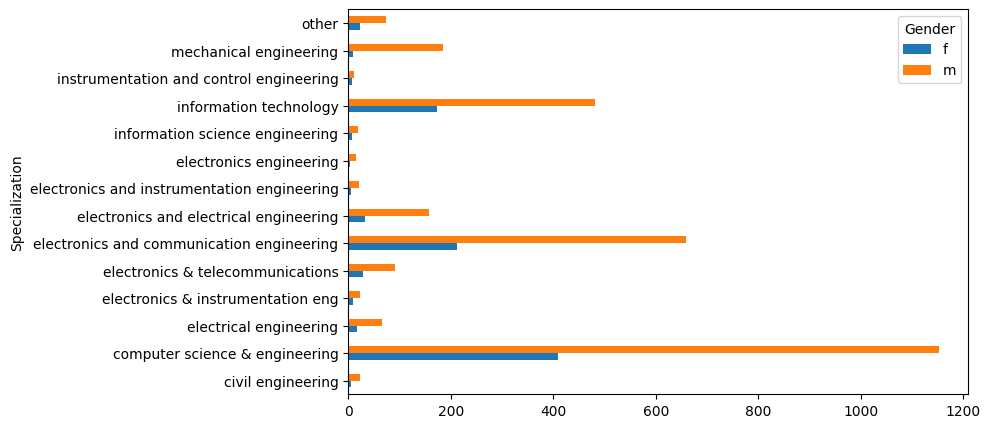

In [491]:
x = pd.crosstab(data.Specialization, data.Gender)
x.plot(kind='barh',figsize=(8,5))



*   **From above plot, very few females are intrested In the field  of Machanical Engineering, production and civil engineering. Hence preference for Specialisation depend on the Gender**
*   **For other Specialisations, Since there are 76% employees are Male and only 26% are female!, the distribution shows that all the Specialisation is equally prefered by both male and female**


# **Conclusion**

### From the given data, 'Salary' as a Target variable. From above analysis we can see how other variables in the data are related to the Target variable.



*   **In the 10th , 12th grade and college those who Scored more then 60% are earning more than those who score below 60%, it shows people who are willing to learn are good fit for the company and likely to earn more with knowledge.**

*   **There is no bias in gender in terms of earning.**





**<<--------------------------------------------------------->> THANK YOU <<----------------------------------------------------------->>**

## **Bonus Analysis**

In [492]:
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/innomatics/data.xlsx - Sheet1.csv')

In [493]:
data1['DOL'].replace('present', today, inplace=True)

data1['DOL'] = pd.to_datetime(data1['DOL'])

data1['DOJ'] = pd.to_datetime(data1['DOJ'])

data1['DOB'] = pd.to_datetime(data1['DOB'])

In [494]:
salary_outliers = data1.loc[data1['Salary'] > 575000]

In [495]:
salary_outliers.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,train,267447,1100000.0,2011-07-01,2024-03-10,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
8,train,552574,600000.0,2013-07-01,2024-03-10,electrical engineer,Noida,m,1991-09-17,90.00,cbse,2009,91.2,cbse,13,1,B.Tech/B.E.,electronics and electrical engineering,85.03,13,1,Delhi,2013,615,670,530,0.694479,735,366,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.7415,-0.2859
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,1989-06-24,88.60,mp board bhopal,2006,83.7,mp board,403,2,B.Tech/B.E.,computer engineering,74.90,403,0,Madhya Pradesh,2010,565,455,565,0.765674,485,-1,-1,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.1798,0.0284
64,train,31330,600000.0,2010-07-01,2012-07-01,java software engineer,Gurgaon,m,1986-05-29,78.00,cbse,2004,83.0,cbse,2,1,B.Tech/B.E.,information technology,72.13,2,1,Delhi,2010,444,555,695,0.999905,804,-1,-1,-1,-1,-1,-1,0.6646,0.3448,0.8171,0.6498,0.0284
76,train,361583,800000.0,2012-06-01,2024-03-10,software engineer,Bangalore,m,1991-01-25,93.44,karnataka state board,2008,90.0,karnataka state board,1384,2,B.Tech/B.E.,computer engineering,87.60,1384,0,Karnataka,2012,515,475,635,0.942117,575,-1,-1,-1,-1,-1,-1,-0.4173,0.9688,-0.1988,-0.2902,0.3049


### OUTLIERS (VS) NON-OUTLIERS

In [496]:
def sct_plot(x,y,x1,x2,y1,y2):

  plt.subplots(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.scatter(y1,x1)
  plt.title('Non-Outlier')
  plt.xlabel(x)
  plt.ylabel(y)

  plt.subplot(1, 2, 2)
  plt.scatter(y2,x2)
  plt.title('Outlier')
  plt.xlabel(x)
  plt.ylabel(y)

  plt.tight_layout()

  plt.show()

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


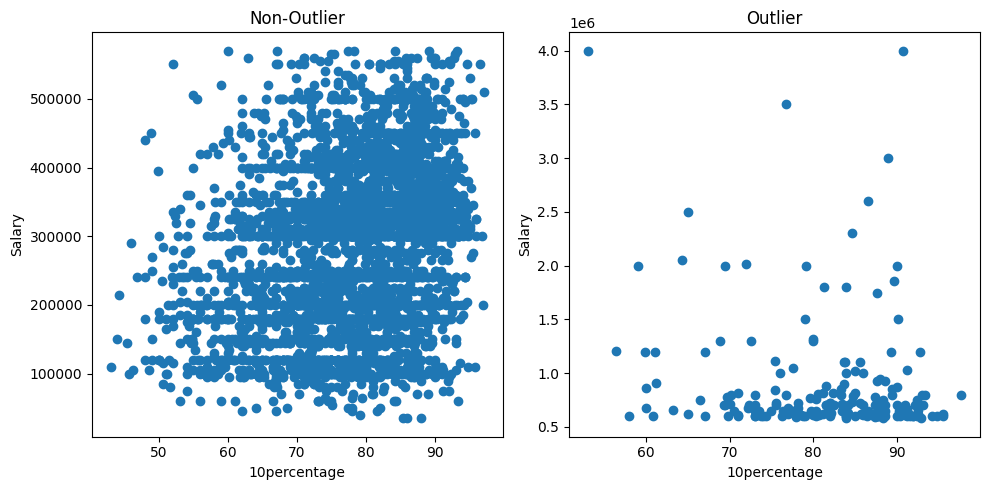

In [497]:
sct_plot('10percentage','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['10percentage'],salary_outliers['10percentage'])



*   Majority of the 10th garde score of non-outliers employees are above 70% which is similar to outliers employees
*   Therefore no abnormal distribution found



<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


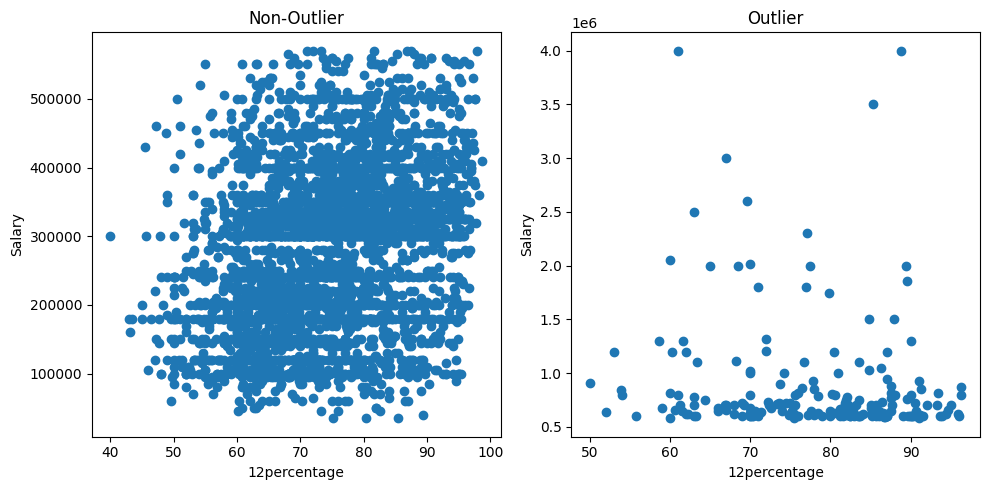

In [498]:
sct_plot('12percentage','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['12percentage'],salary_outliers['12percentage'])



*   Majority of the 12th garde score of non-outliers employees are above 60% whereas majarity of outliers employees scores above 70%
*   it shows the outlier employees are in constant learning process

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


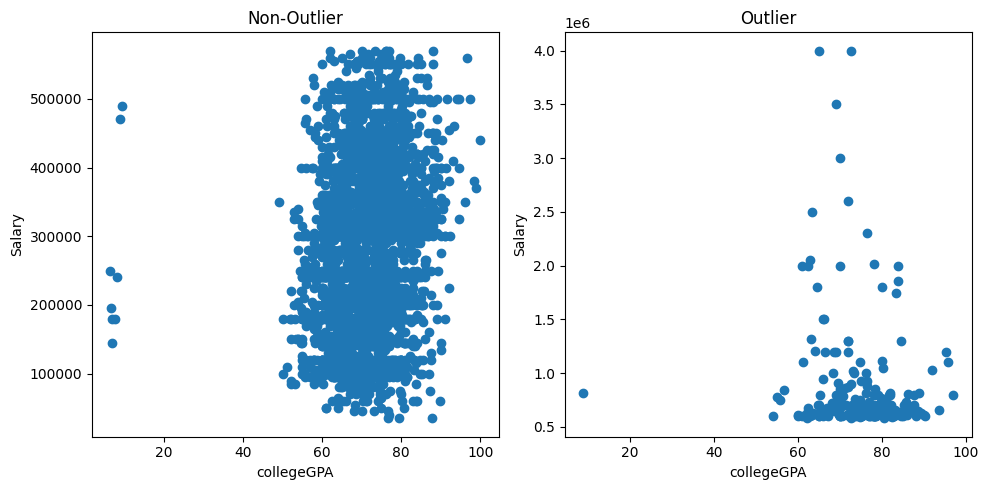

In [499]:
sct_plot('collegeGPA','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['collegeGPA'],salary_outliers['collegeGPA'])



*   Majority of the GPA score of non-outliers employees are between 60-85% whereas majority outliers employees scored 60-90%
*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


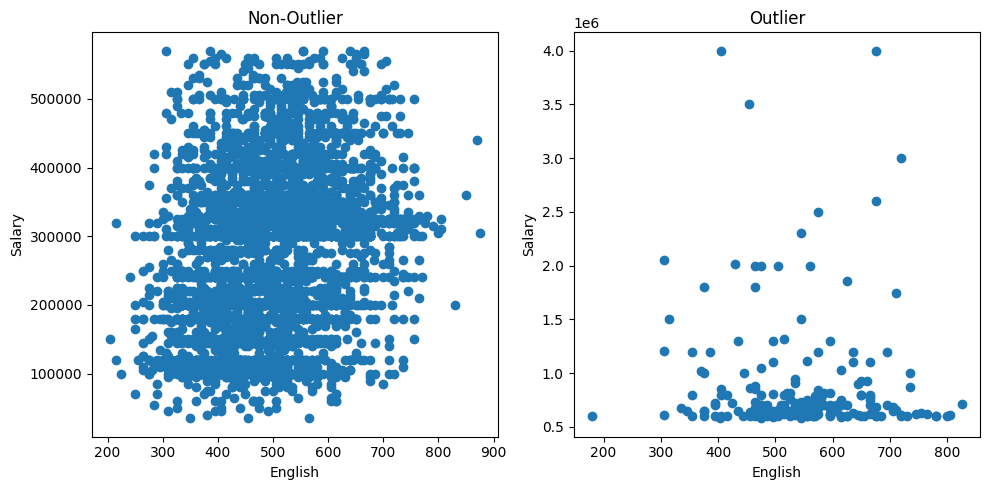

In [500]:
sct_plot('English','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['English'],salary_outliers['English'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


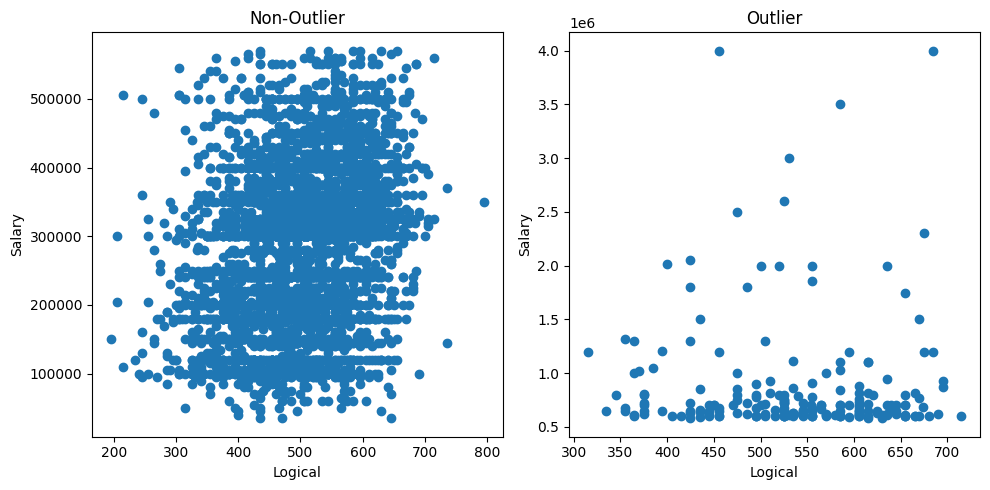

In [501]:
sct_plot('Logical','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['Logical'],salary_outliers['Logical'])



*   Majority of non-outliers employees have scored between 400-650 in AMCAT logical thinking which is similar to outliers employees
*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


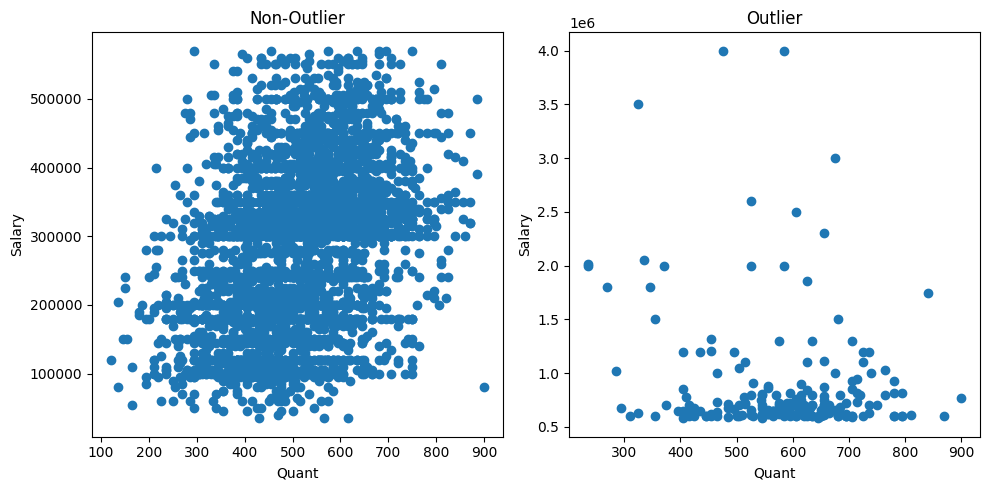

In [502]:
sct_plot('Quant','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['Quant'],salary_outliers['Quant'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


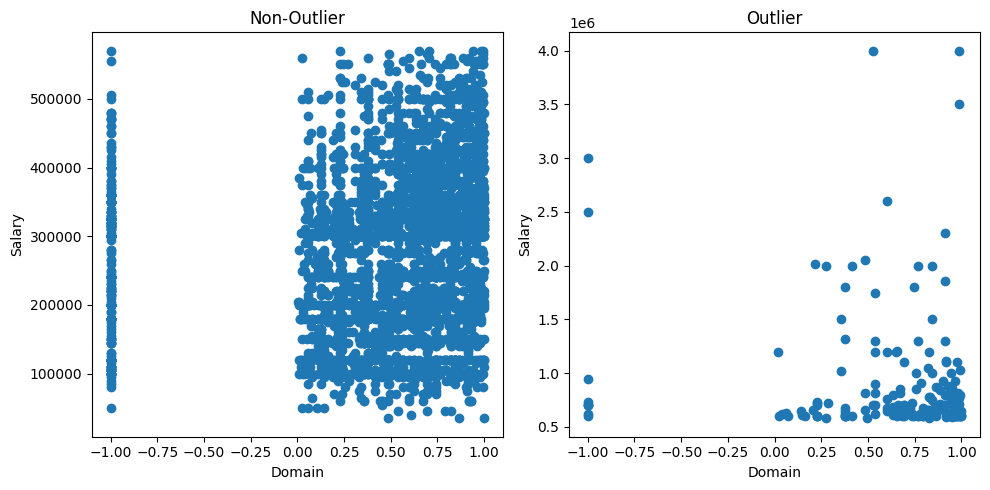

In [503]:
sct_plot('Domain','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['Domain'],salary_outliers['Domain'])



*   majority of outlier Employees have Domine knowledge

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


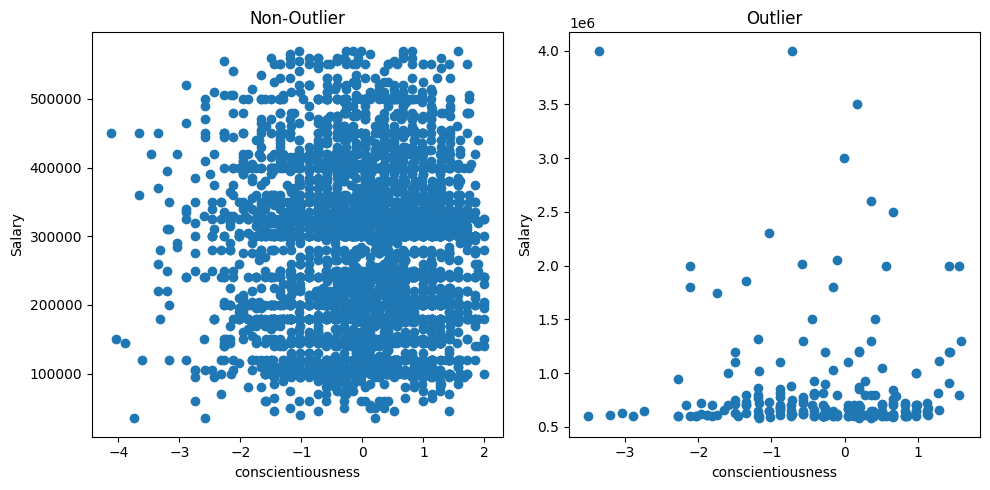

In [504]:
sct_plot('conscientiousness','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['conscientiousness'],salary_outliers['conscientiousness'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


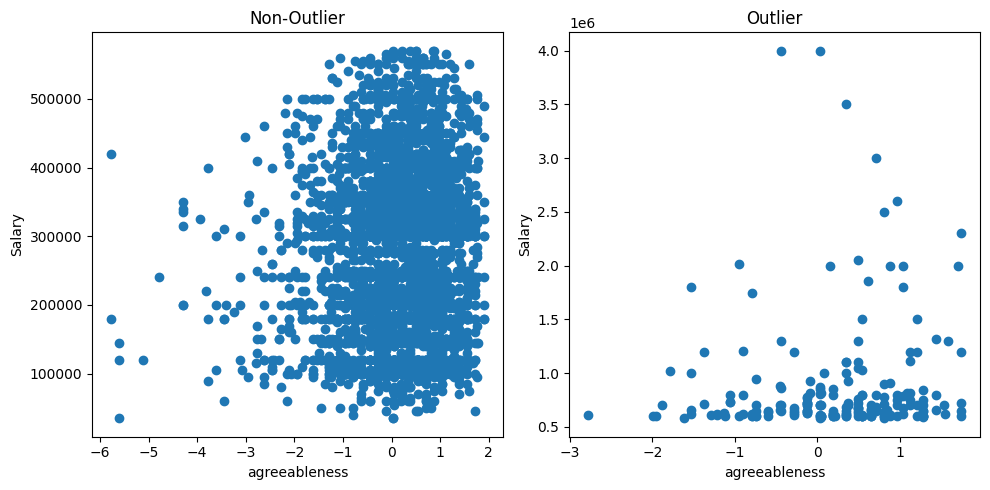

In [505]:
sct_plot('agreeableness','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['agreeableness'],salary_outliers['agreeableness'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


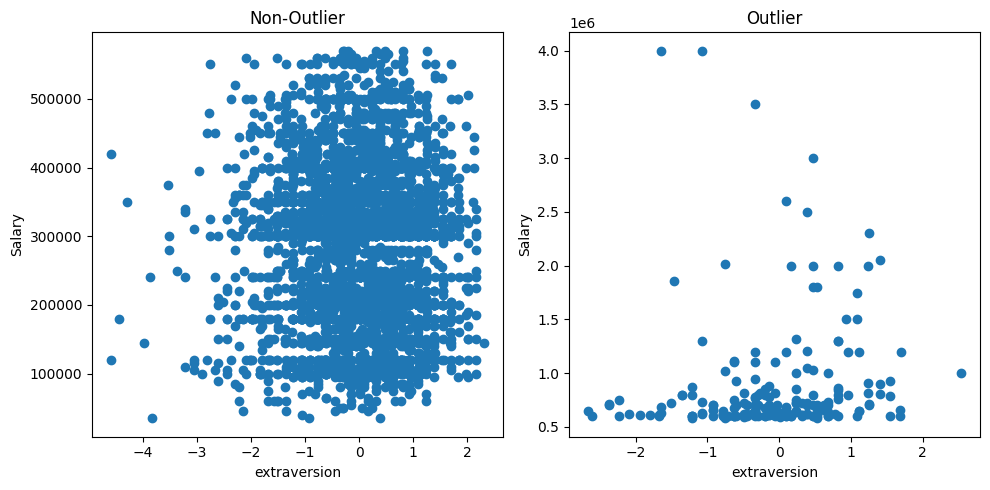

In [506]:
sct_plot('extraversion','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['extraversion'],salary_outliers['extraversion'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


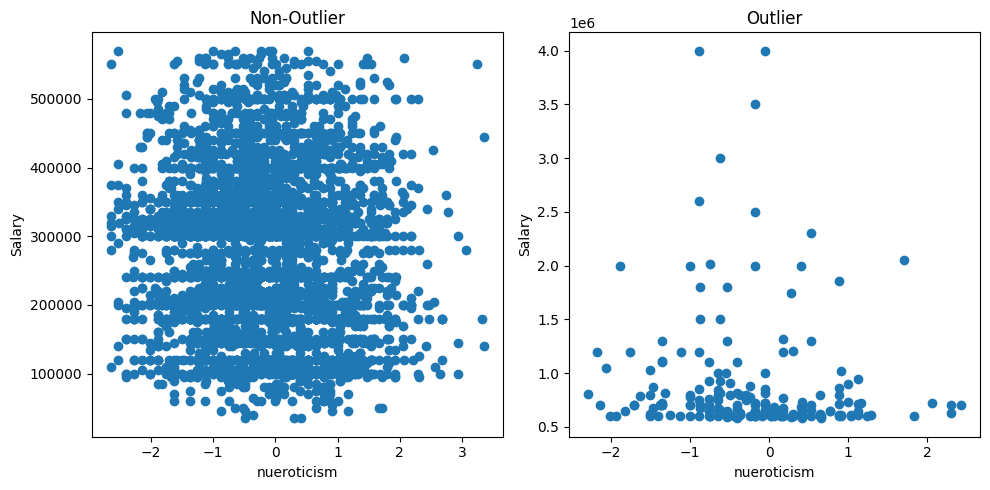

In [507]:
sct_plot('nueroticism','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['nueroticism'],salary_outliers['nueroticism'])



*   No Abnormal Distribution Found

<ipython-input-496-4cf28daddf77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


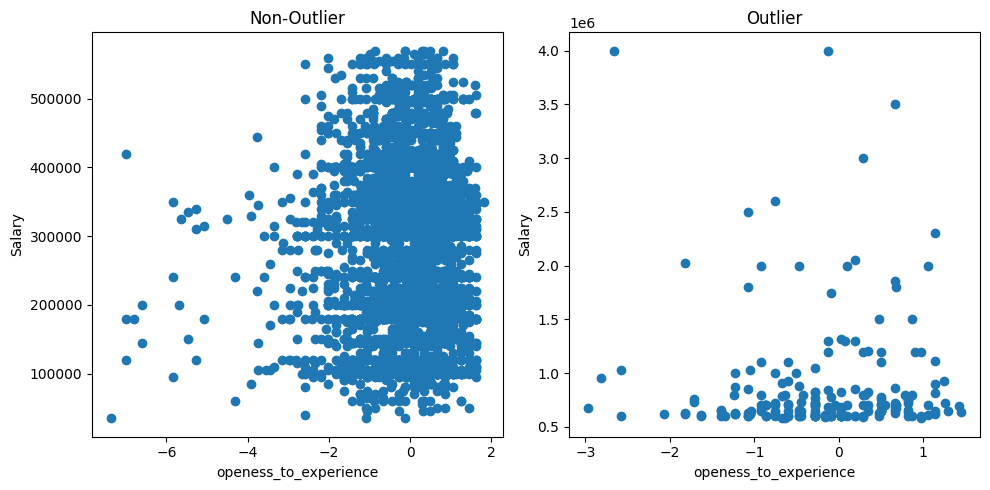

In [508]:
sct_plot('openess_to_experience','Salary',salary_outliers_treated['Salary'],salary_outliers['Salary'],salary_outliers_treated['openess_to_experience'],salary_outliers['openess_to_experience'])



*   No Abnormal Distribution Found

In [509]:
salary_outliers.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
3,train,267447,1100000.0,2011-07-01,2024-03-10,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194
8,train,552574,600000.0,2013-07-01,2024-03-10,electrical engineer,Noida,m,1991-09-17,90.00,cbse,2009,91.2,cbse,13,1,B.Tech/B.E.,electronics and electrical engineering,85.03,13,1,Delhi,2013,615,670,530,0.694479,735,366,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.7415,-0.2859
10,train,87291,600000.0,2011-04-01,2015-04-01,senior php developer,Bangalore,m,1989-06-24,88.60,mp board bhopal,2006,83.7,mp board,403,2,B.Tech/B.E.,computer engineering,74.90,403,0,Madhya Pradesh,2010,565,455,565,0.765674,485,-1,-1,-1,-1,-1,-1,0.0464,0.8128,0.0914,0.1798,0.0284
64,train,31330,600000.0,2010-07-01,2012-07-01,java software engineer,Gurgaon,m,1986-05-29,78.00,cbse,2004,83.0,cbse,2,1,B.Tech/B.E.,information technology,72.13,2,1,Delhi,2010,444,555,695,0.999905,804,-1,-1,-1,-1,-1,-1,0.6646,0.3448,0.8171,0.6498,0.0284
76,train,361583,800000.0,2012-06-01,2024-03-10,software engineer,Bangalore,m,1991-01-25,93.44,karnataka state board,2008,90.0,karnataka state board,1384,2,B.Tech/B.E.,computer engineering,87.60,1384,0,Karnataka,2012,515,475,635,0.942117,575,-1,-1,-1,-1,-1,-1,-0.4173,0.9688,-0.1988,-0.2902,0.3049


### **Observation**

*   **Outlier employees shows no significant difference between them and Non-outlier Employees except in salary difference**
*   **Therefore Layoff the outlier employees are best in terms of company's profit and recruting new taleted freshers will benifit the company**
